In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types from each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset-create new data set named pyber_data_df
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city", "city" ])
#the first 4 columns are from the city_data and the last 2 are added to the right in the merged df
#Display the DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
average_fare = pyber_data_df["fare"].mean()
average_fare

26.753111578947426

In [17]:
#ride_data_df["city"].unique()
number_of_cities = len(ride_data_df["city"].unique())
number_of_cities

120

In [18]:
ave_fare_per_city = pyber_data_df.groupby(["city"]).mean()["fare"]
ave_fare_per_city

city
Amandaburgh         24.641667
Barajasview         25.332273
Barronchester       36.422500
Bethanyland         32.956111
Bradshawfurt        40.064000
                      ...    
West Robert         25.123871
West Samuelburgh    21.767600
Williamsonville     31.875000
Williamsstad        24.362174
Williamsview        26.599000
Name: fare, Length: 120, dtype: float64

In [19]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
#Create the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [23]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [25]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for each city forthe suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
#urban_driver_count.head()
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
#rural_driver_count.head()

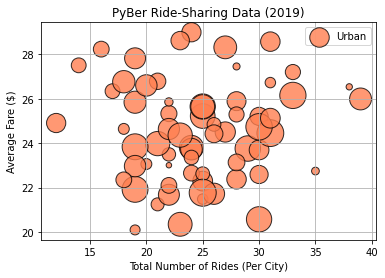

In [27]:
#Create scatter charts(bubble charts) using MATLAB Method 'plt.scatter()'. for urban cities, size=urban driver count,
# increase size of bubbles by factor of 10, add black edge to line width of 1, color urban coral and 20% transparent).
#add title, labels, legend and grid)
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

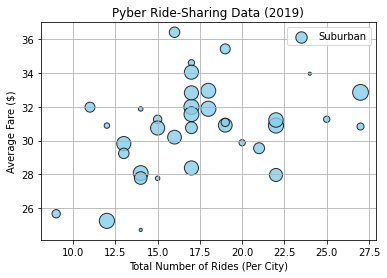

In [28]:
#Build Scatter Plots for suburban citis.
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

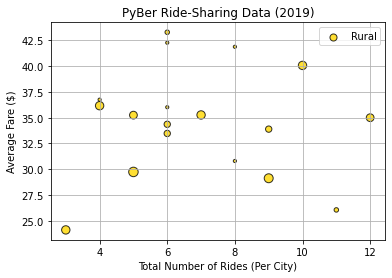

In [29]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

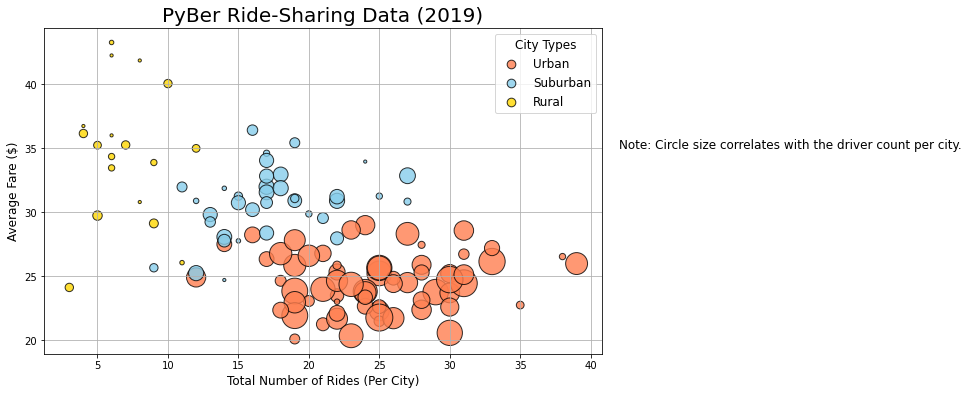

In [30]:
# Add the scatter charts for each type of city. COMBINE the three scatter charts
plt.subplots(figsize=(10,6))#enlarge figure size
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

#Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create the legend, declare a variable, add parameters for font size, legend location, legend title etc
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Add a text label about the circle size=42 and 35 are the positions on x and y axis for the added label
plt.text(42, 35, "Note: Circle size correlates with the driver count per city.", fontsize="12")
#Save the figure, provide a direct path to the folder and filename of saved image
plt.savefig("analysis/Fig1.png")

# Show the plot
#plt.show()

In [31]:
# Get Summary Statistics for Urban Cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [32]:
#Summary Statistics for suburban
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [33]:
#Summary Statistics for rural
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [34]:
#Summary statistics for ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [35]:
#Stats for Suburban ride count
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [36]:
#Stats for Rural Ride Count
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [37]:
# PANDAS mean(), method(), mode() Methods
#Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)
#output will be the average ride count for each city type rounded to two decimal places

(24.62, 17.36, 6.94)

In [38]:
# MEDIAN number of rides for each city. PANDAS
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [39]:
#Calculate the MODE of the ride count for urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [40]:
# MODE for Suburban
suburban_ride_count.mode()

0    17
dtype: int64

In [41]:
# Import NumPy and the stats module from SciPy for optional approaches to calc mean, median, mode of DF or Series
import numpy as np
import scipy.stats as sts


In [42]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [43]:
# Stats/measures of central tendency for suburb
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [44]:
# Stats/measures of central tendency for rural
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [45]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [46]:
# Calculate the measures of central tendency for the average FARE for the URBAN cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [47]:
# Get the fares from the suburban cities
suburban_fares = suburban_cities_df["fare"]

In [48]:
# Calculate the measures of central tend for the ave FARE for the SUBURBAN cities. Use Numpy and SciPy 
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

#use Scipy-sts for MODE
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [49]:
# Get the fares from rural cities
rural_fares = rural_cities_df["fare"]

In [51]:
# Calculate the measures of central tendency for the average FARE for the RURAL cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The rural fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The rural fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [53]:
# Get the driver count from the urban cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [55]:
# Calculate the measures of central tendency for the average DRIVER COUNT for the URBAN cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban drivers is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban drivers is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban drivers is {mode_urban_drivers}.")

The mean driver count for urban drivers is $36.68.
The median driver count for urban drivers is $37.00.
The mode driver count for urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [58]:
# Get the DRIVER from SUBURBAN Cities
suburban_drivers = suburban_cities_df["driver_count"]

In [63]:
# Calculate the measures of central tendency for the average DRIVER COUNT for the SUBURBAN cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban drivers is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban drivers is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban drivers is {mode_suburban_drivers}.")


The mean driver count for suburban drivers is 14.
The median driver count for suburban drivers is 16.
The mode driver count for suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [65]:
# Get the DRIVER count from RURAL Cities
rural_drivers = rural_cities_df["driver_count"]

In [66]:
# Get the DRIVER count from RURAL Cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural drivers is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural drivers is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural drivers is {mode_rural_drivers}.")

The mean driver count for rural drivers is 4.
The median driver count for rural drivers is 4.
The mode driver count for rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


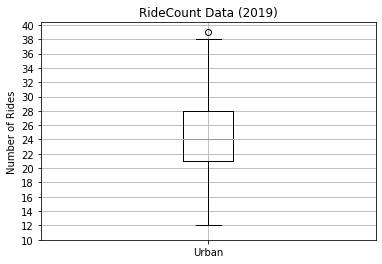

In [69]:
# Create a box-and-whisker plot for the urban cities and ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title("RideCount Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


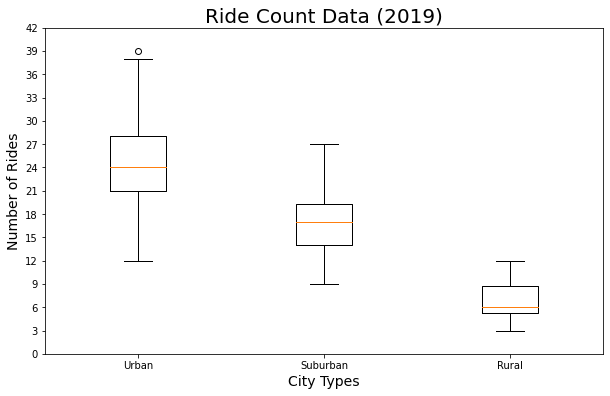

In [73]:
# Add all ride count box-and-whiskers plots to the same graph(combine data for urban, suburban and rural)
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data =[urban_ride_count, suburban_ride_count, rural_ride_count]
fix, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3))
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()
              

In [74]:
# Outlier for Urban is 39. Get the City that matches the 39 to identify the outlier
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


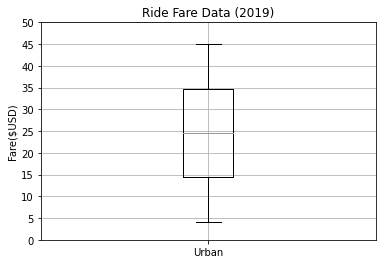

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [77]:
# Create Box and Whiskers for the URBAN FARE data
x_labels = ["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis labe and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

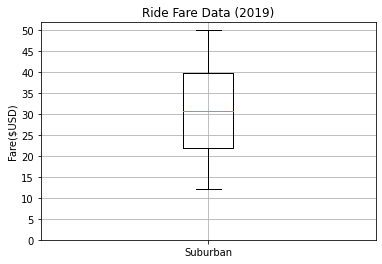

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [78]:
# Create Box and Whiskers for the SUBURBAN FARE data
x_labels = ["Suburban"]
fix, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

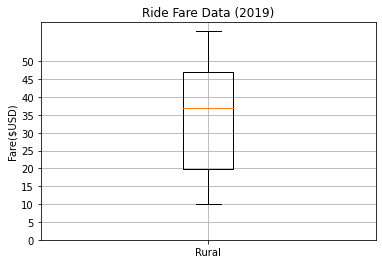

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [79]:
#Create Box and Whiskers plot for the RURAL FARE
x_labels = ["Rural"]
fix, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

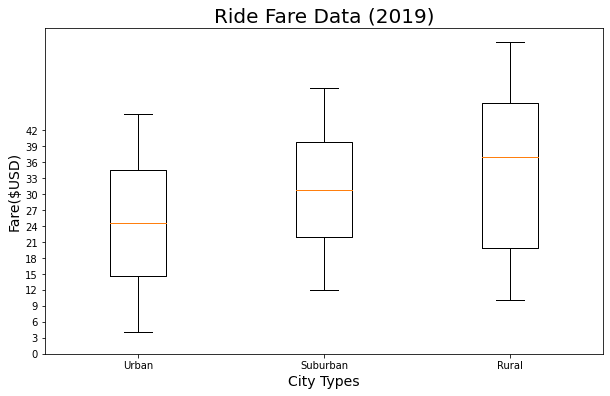

In [81]:
# Create a box and whisker plot with ALL city types FARE
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data =[urban_fares, suburban_fares, rural_fares]
fix, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3))
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()


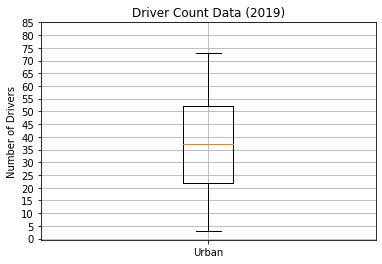

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [84]:
# Create the box-and-whisker plot for the URBAN DRIVER COUNT data.
x_labels = ["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

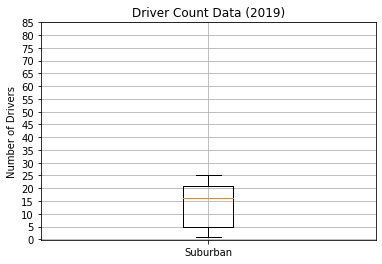

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [85]:
# Create the box-and-whisker plot for the SUBURBAN DRIVER count data.
x_labels = ["Suburban"]
fix, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

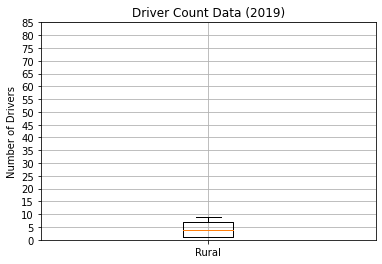

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [86]:
# Create the box-and-whisker plot for the RURAL count data.
x_labels = ["Rural"]
fix, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

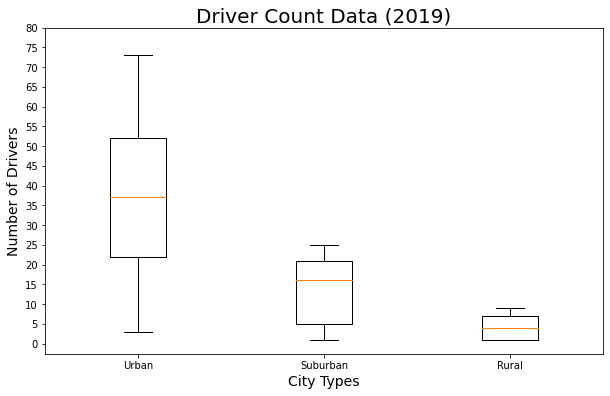

In [90]:
# Create a box and whisker plot with ALL city types DRIVER COUNT
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data =[urban_drivers, suburban_drivers, rural_drivers]
fix, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 85, step=5.0))
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [94]:
# Get the sum of the FARES by TYPE USING GROUPBY.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type
#the output is a SERIES with the sum of the fares for each city type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [95]:
#Get the total of all the fares by using sum() on the fare column
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [96]:
# Calculate the PERCENTAGE OF FARE for EACH city TYPE
type_percents = 100 * sum_fares_by_type/ total_fares
type_percents
#OR-when you get more advanced
#type_percents = 100 * pyber_data_df.groupby(["type"]).sum(["fare"])/pyber_data_df["fare"].sum()


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

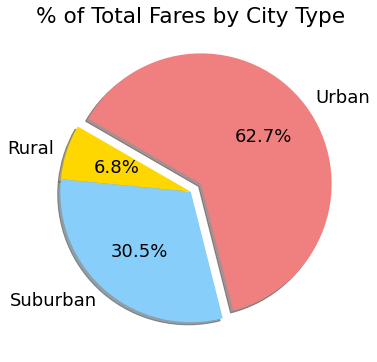

In [103]:
# Build the PERCENTAGE of FARES by CITY TYPE pie chart.
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10-14-had to import matplotlib on first line of cell to do this
mpl.rcParams['font.size'] = 14
#Show Figure
plt.show

In [105]:
# Get the total number of RIDES 
pyber_data_df["ride_id"].count()

2375

In [109]:
# Calculate the PERCENTAGE of RIDES for each city TYPE
ride_percents = 100* pyber_data_df.groupby(["type"]).count()["ride_id"]/ pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

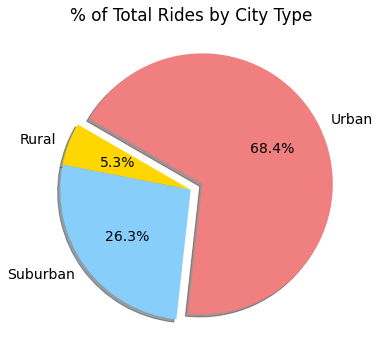

In [110]:
# Build percentage of RIDES by city TYPE pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [111]:
# Get the total number of drivers for each city type
pyber_data_df["driver_count"].count()

2375

In [113]:
# Calculate the PERCENTAGE of DRIVERS for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

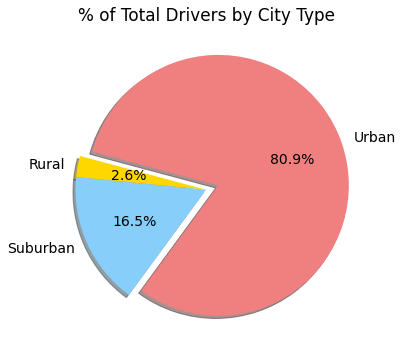

In [114]:
# Build PERCENTAGE of DRIVERS by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()